In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.append('/Users/sihonghe/Documents/2018_Fall/273AML/')
import mltools as ml

data = np.genfromtxt("curve80.txt",delimiter=None) # load the text file 
X = data[:,0] 
X = X[:,np.newaxis] # code expects shape (M,N) so make sure it's 2-dimensional 
Y = data[:,1] # doesn't matter for Y 
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

In [2]:
#273A_HW2_SihongHe
#####
#1.1#
#####
print("Xtr's shape is", Xtr.shape)
print("Xte's shape is", Xte.shape)
print("Ytr's shape is", Ytr.shape)
print("Yte's shape is", Yte.shape)

Xtr's shape is (60, 1)
Xte's shape is (20, 1)
Ytr's shape is (60,)
Yte's shape is (20,)


linear regression coefficients:
[[-2.82765049  0.83606916]]


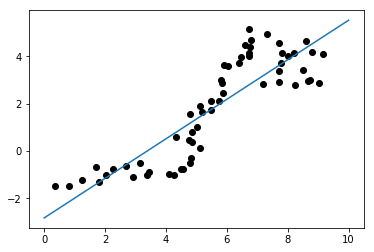

In [3]:
#####
#1.2#
#####
lr = ml.linear.linearRegress( Xtr, Ytr ); # create and train model
xs = np.linspace(0,10,200); # densely sample possible x-values 
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code) 
ys = lr.predict( xs ); # make predictions at xs 
######
#1.2a#
######
plt.plot(Xtr,Ytr,'ko')
######
#1.2b#
######
plt.plot(xs,ys)
print ("linear regression coefficients:") 
print (lr.theta)
#Yes, it matches,

In [4]:
######
#1.2c#
######
print ("\nMSE on training data:") 
print (lr.mse( Xtr,Ytr )) 
print ("\nMSE on test data:") 
print (lr.mse( Xte,Yte )) 


MSE on training data:
1.127711955609391

MSE on test data:
2.2423492030101246


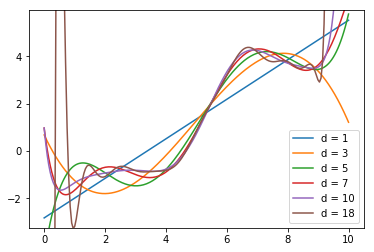

In [5]:
#####
#1.3#
#####
ran = [1,3,5,7,10,18]
train_err = []
test_err =[]
for degree in ran:
# Create polynomial features up to "degree"; don't create constant feature
#(the linear regression learner will add the constant feature automatically)
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
# Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
#"params" returns the transformation parameters (shift & scale)
# Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress( XtrP, Ytr )
# create and train model
# Now, apply the same polynomial expansion & scaling transformation to Xtest:
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params)
    xs = np.linspace(0,10,200); # densely sample possible x-values 
    xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code) 
    ys = lr.predict( ml.transforms.rescale( ml.transforms.fpoly(xs,degree,False), params)[0] ); 
    # make predictions at xs
    train_err.append(lr.mse(XtrP,Ytr))
    test_err.append(lr.mse(XteP,Yte))
    ######
    #1.3a#
    ######
    plt.plot(xs,ys)
    ax = plt.axis();
    plt.axis(ax)
    
plt.legend(['d = 1','d = 3','d = 5','d = 7','d = 10','d = 18']) 
plt.show()

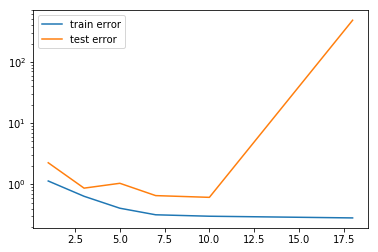

In [6]:
######
#1.3b#
######
plt.semilogy(ran,train_err) 
plt.semilogy(ran,test_err) 
plt.legend(['train error','test error']) 
plt.show()

In [7]:
######
#1.3c#
######
for i in [0,1,2,3,4,5]:
     print("degree =", ran[i], ", MSE on test data:", test_err[i])
# I recommend degree = 10 because the MSE on test data is least.

degree = 1 , MSE on test data: 2.242349203010125
degree = 3 , MSE on test data: 0.8616114815449999
degree = 5 , MSE on test data: 1.0344190205632136
degree = 7 , MSE on test data: 0.6502246079668772
degree = 10 , MSE on test data: 0.6090600748838114
degree = 18 , MSE on test data: 482.28019966765476


In [8]:
###
#2#
###
ran = [1,3,5,7,10,18]
cv_err = []

for degree in ran:
    nFolds = 5;
    J = np.zeros((nFolds,1))
    for iFold in range(nFolds):
        XtrP = ml.transforms.fpoly(Xtr, degree, bias=False); 
        XtrP, params = ml.transforms.rescale(XtrP);
        Xti,Xvi,Yti,Yvi = ml.crossValidate(XtrP,Ytr,nFolds,iFold)
        # use ith block as validation
        learner = ml.linear.linearRegress(Xti,Yti)
        # TODO: train on Xti, Yti, the data for this fold
        J[iFold] = learner.mse(Xvi,Yvi)
        # TODO: now compute the MSE on Xvi, Yvi and save it
# the overall estimated validation error is the average of the 
#error on each fold
    cv_err.append(np.mean(J))


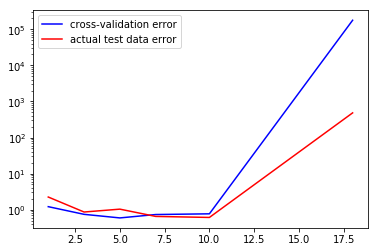

In [9]:
#####
#2.1#
#####
plt.semilogy(ran,cv_err,'b')
plt.semilogy(ran,test_err,'r')
plt.legend(['cross-validation error','actual test data error']) 
plt.show()

In [10]:
#####
#2.2#
#####
# before 10, the difference is not that large. They are very close.
# after 10, the difference gets larger.

In [11]:
#####
#2.3#
#####
# I recommend degree = 4.

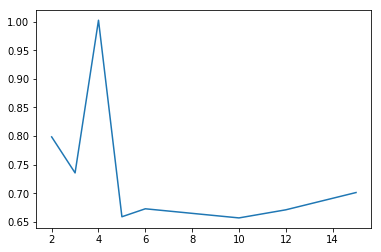

In [12]:
#####
#2.4#
#####
ran2 = [2,3,4,5,6,10,12,15]
cv_err2 = []

for nFolds in ran2:
    degree = 4;
    J = np.zeros((nFolds,1))
    for iFold in range(nFolds):
        XtrP = ml.transforms.fpoly(Xtr, degree, bias=False); 
        XtrP, params = ml.transforms.rescale(XtrP);
        Xti,Xvi,Yti,Yvi = ml.crossValidate(XtrP,Ytr,nFolds,iFold)# use ith block as validation
        learner = ml.linear.linearRegress(Xti,Yti)# TODO: train on Xti, Yti, the data for this fold
        J[iFold] = learner.mse(Xvi,Yvi)# TODO: now compute the MSE on Xvi, Yvi and save it
# the overall estimated validation error is the average of the error on each fold
    cv_err2.append(np.mean(J))
    
plt.plot(ran2,cv_err2)
plt.show()

In [13]:
# We can see a peak appears when degree = 4. And the error is 1!
# Because there is no right prediction.

Statement of Collaboration

I did not discuss these problems with any people.